In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import pickle
import torchvision
from torchvision import datasets, models, transforms, utils


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms, utils
import torchvision.transforms.functional as TF

import numpy as np
import json
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.transform
from PIL import Image
import time
import os
from os.path import join, exists
import copy
import random
from collections import OrderedDict



In [3]:
input_size = 299              # image size fed into the model

data_transforms = {
    'train_before_interpolation': transforms.Compose([
        transforms.Resize((input_size, input_size)),
        transforms.ToTensor(),
    ]),
    'train_after_interpolation': transforms.Compose([
        transforms.ToPILImage(),
    ]),
    'val': transforms.Compose([
        transforms.Resize((input_size, input_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
}


In [ ]:
dataset_psel_0 = ImageFolderModifiedLisaTrain(os.path.join(data_dir,'train'), 
                                                            data_transforms['train_before_interpolation'],
                                                            data_transforms['train_after_interpolation'],
                                                            psel=0)

In [ ]:
dataset_psel_1 = ImageFolderModifiedLisaTrain(os.path.join(data_dir,'train'), 
                                                            data_transforms['train_before_interpolation'],
                                                            data_transforms['train_after_interpolation'],
                                                            psel=1.)

In [6]:
X_1_filepath = '/home/ubuntu/deepsolar/data/ds-france/google/ft_100/train/1fr/ABLGB4A02YFIJA.png'
X_2_intra_label_filepath = '/home/ubuntu/deepsolar/data/ds-france/google/ft_100/train/1us/32072.png'
X_2_intra_domain_filepath = '/home/ubuntu/deepsolar/data/ds-france/google/ft_100/train/0fr/FQVRT1060XBOFA.png'

In [7]:
X_1_image = data_transforms['train_before_interpolation'](Image.open(X_1_filepath).convert('RGB'))
X_2_intra_label = data_transforms['train_before_interpolation'](Image.open(X_2_intra_label_filepath).convert('RGB'))
X_2_intra_domain = data_transforms['train_before_interpolation'](Image.open(X_2_intra_domain_filepath).convert('RGB'))
l = 0.6


<PIL.Image.Image image mode=RGB size=299x299 at 0x7FCF68542730>


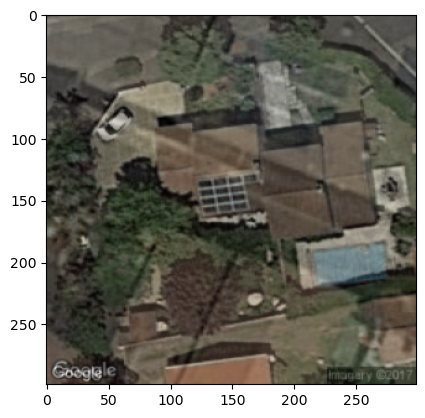

In [16]:
interpolated_intra_label_image = l * X_1_image + (1. - l) * X_2_intra_label 
interpolated_intra_label_image_formatted = data_transforms['train_after_interpolation'](interpolated_intra_label_image)
plt.imshow(interpolated_intra_label_image.permute((1, 2, 0)))
print(interpolated_intra_label_image_formatted)
interpolated_intra_label_image_formatted.save('intra_label.png')


<PIL.Image.Image image mode=RGB size=299x299 at 0x7FCF6846F880>


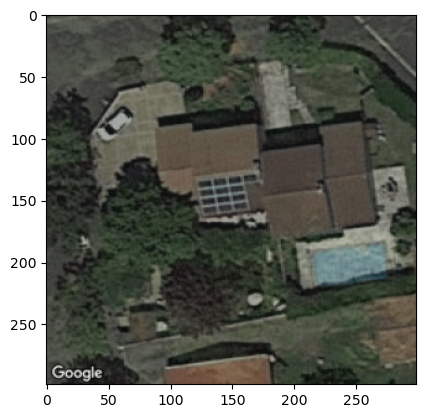

In [17]:
interpolated_intra_domain_image = l * X_1_image + (1. - l) * X_2_intra_domain
interpolated_intra_domain_image_formatted = data_transforms['train_after_interpolation'](interpolated_intra_domain_image)
plt.imshow(interpolated_intra_domain_image.permute((1, 2, 0)))
print(interpolated_intra_domain_image_formatted)
interpolated_intra_domain_image_formatted.save('intra_domain.png')
